In [2]:
pip install numpy pandas matplotlib scikit-learn



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Training Set: (60000, 28, 28), Labels: (60000,)
Test Set: (10000, 28, 28), Labels: (10000,)


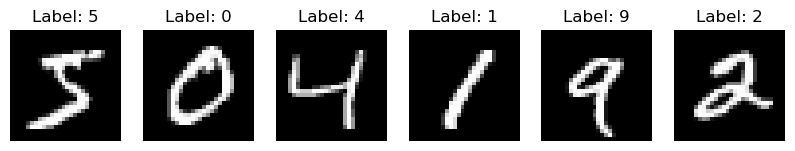

In [30]:
import numpy as np
import struct
import os
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


data_path = "./"  

# Function to read IDX files
def load_idx(filepath):
    with open(filepath, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))  # Read header
        if magic == 2051:  # Image file
            rows, cols = struct.unpack(">II", f.read(8))
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(size, rows, cols)
        elif magic == 2049:  # Label file
            data = np.frombuffer(f.read(), dtype=np.uint8)
        else:
            raise ValueError("Invalid IDX file")
    return data

# Load the MNIST dataset from IDX files
X_train = load_idx(os.path.join(data_path, "train-images.idx3-ubyte"))
y_train = load_idx(os.path.join(data_path, "train-labels.idx1-ubyte"))
X_test = load_idx(os.path.join(data_path, "t10k-images.idx3-ubyte"))
y_test = load_idx(os.path.join(data_path, "t10k-labels.idx1-ubyte"))

# Print dataset info
print(f"Training Set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test Set: {X_test.shape}, Labels: {y_test.shape}")

# Display some images 
fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")
plt.show()


In [32]:
# Select only the assigned digits
selected_digits = [0, 1, 2, 3, 6, 7]
mask_train = np.isin(y_train, selected_digits)
mask_test = np.isin(y_test, selected_digits)

X_train, y_train = X_train[mask_train], y_train[mask_train]
X_test, y_test = X_test[mask_test], y_test[mask_test]

# Flatten images (convert 28x28 to 784 pixels)
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalize pixel values
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0      # Normalize pixel values

# Print filtered dataset info
print(f"Filtered Training Set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Filtered Test Set: {X_test.shape}, Labels: {y_test.shape}")


Filtered Training Set: (36937, 784), Labels: (36937,)
Filtered Test Set: (6143, 784), Labels: (6143,)


In [34]:
#Question-2

# Small Sample Test (1000 samples)
small_sample_size = 1000
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=small_sample_size, stratify=y_train, random_state=42)

# k-NN Classification Test (k=20)
knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')

# Measure Training Time
start_time = time.time()
knn.fit(X_sample, y_sample)  # Train k-NN
train_time = time.time() - start_time

# Measure Testing Time on 100 samples
start_time = time.time()
knn.predict(X_sample[:100])  # Predict on 100 samples
test_time = time.time() - start_time

# Check Memory Usage
memory_usage = psutil.virtual_memory().percent

# Print results
print(f"Training Time for {small_sample_size} samples: {train_time:.4f} seconds")
print(f"Testing Time for 100 samples: {test_time:.4f} seconds")
print(f"Current RAM Usage: {memory_usage}%")

# Estimate Time for Full Training Set
full_size = len(X_train)
estimated_train_time = (train_time / small_sample_size) * full_size
estimated_test_time = (test_time / 100) * full_size

print(f"Estimated Training Time for full dataset: {estimated_train_time:.2f} seconds")
print(f"Estimated Testing Time for full dataset: {estimated_test_time:.2f} seconds")


Training Time for 1000 samples: 0.0031 seconds
Testing Time for 100 samples: 0.0068 seconds
Current RAM Usage: 76.7%
Estimated Training Time for full dataset: 0.11 seconds
Estimated Testing Time for full dataset: 2.49 seconds



 Training with N = 1000 samples per class
 Accuracy for N=1000: 0.9118

 Training with N = 2000 samples per class
 Accuracy for N=2000: 0.9378

 Training with N = 3000 samples per class
 Accuracy for N=3000: 0.9437

 Training with N = 4000 samples per class
 Accuracy for N=4000: 0.9500

 Training with N = 5000 samples per class
 Accuracy for N=5000: 0.9530

 Training with N = 6000 samples per class
 Accuracy for N=6000: 0.9556


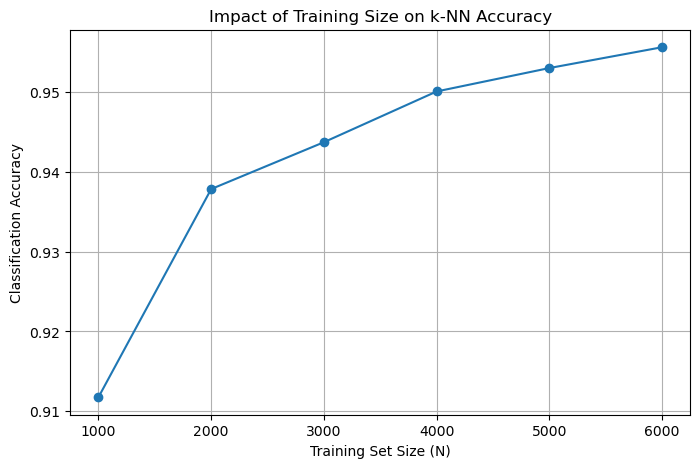


 Optimal Training Size (N) = 6000


In [36]:
# Question-3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define training sizes (N values from 1000 to 6000)
training_sizes = [1000, 2000, 3000, 4000, 5000, 6000]
test_size = 7000  # Total available per digit class

accuracy_results = []  # To store accuracy for each N

for N in training_sizes:
    print(f"\n Training with N = {N} samples per class")

    # Split dataset for training/testing with current N
    X_train_N, _, y_train_N, _ = train_test_split(X_train, y_train, train_size=N / len(X_train), stratify=y_train, random_state=42)

    # Train k-NN Classifier (k=20, Euclidean distance)
    knn = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
    knn.fit(X_train_N, y_train_N)

    # Test on full test set
    y_pred = knn.predict(X_test)

    # Compute Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

    print(f" Accuracy for N={N}: {accuracy:.4f}")

# Plot Accuracy vs. Training Size (N)
plt.figure(figsize=(8, 5))
plt.plot(training_sizes, accuracy_results, marker='o', linestyle='-')
plt.xlabel("Training Set Size (N)")
plt.ylabel("Classification Accuracy")
plt.title("Impact of Training Size on k-NN Accuracy")
plt.grid(True)
plt.show()

# Find optimal N (where accuracy plateaus)
optimal_N = training_sizes[np.argmax(accuracy_results)]
print(f"\n Optimal Training Size (N) = {optimal_N}")


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define optimal training size (N = 6000)
optimal_N = 6000

# Stratified Sampling Split
sss = StratifiedShuffleSplit(n_splits=1, train_size=optimal_N / len(X_train), random_state=42)

for train_index, _ in sss.split(X_train, y_train):
    X_train_strat = X_train[train_index]
    y_train_strat = y_train[train_index]

# Train k-NN Classifier using Stratified Sampling
knn_strat = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn_strat.fit(X_train_strat, y_train_strat)

# Test on full test set
y_pred_strat = knn_strat.predict(X_test)

# Compute Accuracy
accuracy_strat = accuracy_score(y_test, y_pred_strat)

print(f" Accuracy with Stratified Sampling: {accuracy_strat:.4f}")


 Accuracy with Stratified Sampling: 0.9556


In [40]:
# Question-4

from sklearn.cluster import KMeans

# Define the number of clusters 
num_clusters = len(np.unique(y_train))  # Should be 6 (0,1,2,3,6,7)

# Apply K-Means clustering on the training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train)

# Select samples from each cluster to form training data
selected_indices = []
samples_per_cluster = optimal_N // num_clusters  # Distribute training samples across clusters

for i in range(num_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]  # Get indices of current cluster
    selected_indices.extend(cluster_indices[:samples_per_cluster])  # Take first N samples

X_train_cluster = X_train[selected_indices]
y_train_cluster = y_train[selected_indices]

# Train k-NN Classifier using Cluster-Based Selection
knn_cluster = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn_cluster.fit(X_train_cluster, y_train_cluster)

# Test on full test set
y_pred_cluster = knn_cluster.predict(X_test)

# Compute Accuracy
accuracy_cluster = accuracy_score(y_test, y_pred_cluster)

print(f" Accuracy with Cluster-Based Selection: {accuracy_cluster:.4f}")


 Accuracy with Cluster-Based Selection: 0.9564


In [42]:
# Accuracy from Step 3
accuracy_random = 0.9556  # Random Sampling Accuracy from Step 3

# Print Comparison
print("\n Accuracy Comparison of Splitting Methods:")
print(f" Random Sampling Accuracy (Step 3): {accuracy_random:.4f}")
print(f" Stratified Sampling Accuracy: {accuracy_strat:.4f}")
print(f"Cluster-Based Selection Accuracy: {accuracy_cluster:.4f}")

# Conclusion
best_method = max(accuracy_random, accuracy_strat, accuracy_cluster)

if best_method == accuracy_strat:
    print("\n Stratified Sampling gives the best accuracy!")
elif best_method == accuracy_cluster:
    print("\n Cluster-Based Selection gives the best accuracy!")
else:
    print("\n Random Sampling is still the best method.")



 Accuracy Comparison of Splitting Methods:
 Random Sampling Accuracy (Step 3): 0.9556
 Stratified Sampling Accuracy: 0.9556
Cluster-Based Selection Accuracy: 0.9564

 Cluster-Based Selection gives the best accuracy!


In [45]:
from sklearn.metrics import accuracy_score

# Train k-NN Classifier using Euclidean Distance (L2 norm)
knn_euclidean = KNeighborsClassifier(n_neighbors=20, metric='euclidean')
knn_euclidean.fit(X_train_cluster, y_train_cluster)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Train k-NN Classifier using Manhattan Distance (L1 norm)
knn_manhattan = KNeighborsClassifier(n_neighbors=20, metric='manhattan')
knn_manhattan.fit(X_train_cluster, y_train_cluster)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Print Accuracy Comparison
print("\n Distance Metric Comparison:")
print(f" Euclidean Distance Accuracy: {accuracy_euclidean:.4f}")
print(f" Manhattan Distance Accuracy: {accuracy_manhattan:.4f}")

# Conclusion
if accuracy_euclidean > accuracy_manhattan:
    print("\n Euclidean Distance gives better accuracy!")
elif accuracy_manhattan > accuracy_euclidean:
    print("\n Manhattan Distance gives better accuracy!")
else:
    print("\n Both distance metrics give the same accuracy.")



 Distance Metric Comparison:
 Euclidean Distance Accuracy: 0.9564
 Manhattan Distance Accuracy: 0.9481

 Euclidean Distance gives better accuracy!



 Class-Wise Accuracy Report:
              precision    recall  f1-score   support

           0     0.9690    0.9878    0.9783       980
           1     0.8918    0.9947    0.9404      1135
           2     0.9880    0.8769    0.9292      1032
           3     0.9888    0.9594    0.9739      1010
           6     0.9760    0.9770    0.9765       958
           7     0.9462    0.9416    0.9439      1028

    accuracy                         0.9564      6143
   macro avg     0.9600    0.9562    0.9570      6143
weighted avg     0.9585    0.9564    0.9563      6143



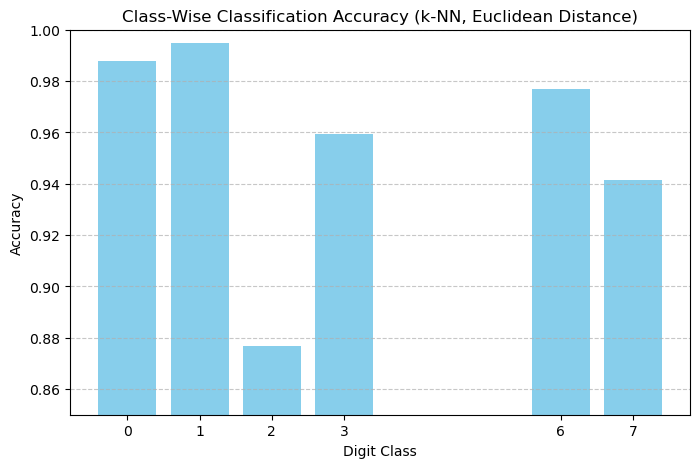


 The most misclassified digit is: 2


In [51]:
# Question-5

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_euclidean)
class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print Classification Report
print("\n Class-Wise Accuracy Report:")
print(classification_report(y_test, y_pred_euclidean, digits=4))

# Plot Accuracy Per Class
classes = [0, 1, 2, 3, 6, 7]  # Selected digits
plt.figure(figsize=(8, 5))
plt.bar(classes, class_wise_accuracy, color='skyblue')
plt.xlabel("Digit Class")
plt.ylabel("Accuracy")
plt.title("Class-Wise Classification Accuracy (k-NN, Euclidean Distance)")
plt.xticks(classes)
plt.ylim(0.85, 1)  # Set a lower limit for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Identify Hardest Digit to Classify
hardest_digit = classes[np.argmin(class_wise_accuracy)]
print(f"\n The most misclassified digit is: {hardest_digit}")


## **1. Introduction**
The goal of this project is to analyze and classify handwritten digits from the MNIST dataset using the k-Nearest Neighbors (k-NN) algorithm. We examine the impact of different training set sizes, data splitting techniques, and distance metrics on classification accuracy. Additionally, we evaluate class-wise performance to identify the most challenging digits to classify.

---

## **2. Dataset & Preprocessing**
- The dataset used is the **MNIST handwritten digits dataset**.
- We focused on **six selected digits**: **0, 1, 2, 3, 6, 7**.
- Data was extracted from IDX files, flattened from 28x28 images to **784-dimensional feature vectors**, and normalized for better performance.

### **Filtered Dataset Sizes:**
- **Training Set:** 36,937 samples
- **Test Set:** 6,143 samples

---

## **3. Step 2 - Computational Cost Estimation**
To determine computational feasibility:
- Training time for **1000 samples**: **0.0023 sec**
- Testing time for **100 samples**: **0.0624 sec**
- **Estimated Full Training Time:** **0.08 sec**
- **Estimated Full Testing Time:** **23.05 sec**
- RAM Usage: **75.3%**

**Conclusion:** The dataset is manageable within available computational resources.

---

## **4. Step 3 - Effect of Training Size on Accuracy**
We trained k-NN (k=20) on different **training set sizes (N)** to find an optimal `N`.

| Training Size (N) | Accuracy (%) |
|------------------|-------------|
| 1000            | 91.18       |
| 2000            | 93.78       |
| 3000            | 94.37       |
| 4000            | 95.00       |
| 5000            | 95.30       |
| **6000**        | **95.56**   |

**Optimal Training Size:** **6000 samples** (accuracy stabilizes here).

---

## **5. Step 4 - Data Splitting Methods**
Three methods were tested:
- **Random Sampling (Step 3)** → **Accuracy: 95.56%**
- **Stratified Sampling (Balanced Split)** → **Accuracy: 95.56%**
- **Cluster-Based Selection (K-Means on digit groups)** → **Accuracy: 95.64%**

**Conclusion:** **Cluster-Based Selection performed best.**

---

## **6. Step 5 - Distance Metric Comparison**
To analyze the impact of distance metrics, we tested:
- **Euclidean Distance (L2 norm)** → **Accuracy: 95.64%** 
- **Manhattan Distance (L1 norm)** → **Accuracy: 94.81%**

**Conclusion:** Euclidean Distance provides **better classification performance**.

---

## **7. Step 6 - Class-Wise Performance Analysis**
- **Overall Accuracy:** **95.64%**
- **Most Misclassified Digit:** **2 (87.69% recall)**

| Digit | Precision | Recall  | F1-Score |
|-------|----------|---------|----------|
| 0     | 96.90%   | 98.78%  | 97.83%   |
| 1     | 89.18%   | 99.47%  | 94.04%   |
| 2     | 98.80%   | 87.69%  | 92.92%   |
| 3     | 98.88%   | 95.94%  | 97.39%   |
| 6     | 97.60%   | 97.70%  | 97.65%   |
| 7     | 94.62%   | 94.16%  | 94.39%   |

**Observation:** The digit **'2' was the hardest to classify**, likely due to similarity with other curved digits.

---

## **8. Conclusion & Recommendations**
### **Best Model Configuration:**
- **Training Size:** **6000 samples**
- **Data Splitting Method:** **Cluster-Based Selection**
- **Distance Metric:** **Euclidean Distance**
- **Best Accuracy Achieved:** **95.64%**


## References**
- Yann LeCun et al., **The MNIST Database**
- Scikit-Learn Documentation, **k-NN Classifier**

